In [188]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [189]:
pnp = 'pnp.jpg'

# Membaca gambar dan konversi ke RGB
img_ori1 = cv2.imread(pnp)
img_ori2 = cv2.cvtColor(img_ori1, cv2.COLOR_BGR2RGB)

In [206]:
# Tentukan rentang warna untuk daun dalam RGB
lower_green = np.array([25, 40, 10])
upper_green = np.array([90, 255, 90])
# Tentukan rentang warna untuk buah dalam RGB
lower_yellow = np.array([150, 120, 0])
upper_yellow = np.array([255, 255, 80])

In [207]:
# Buat maska untuk daun (hijau)
mask_daun = cv2.inRange(img_ori1, lower_green, upper_green)

# Buat maska untuk buah (kuning)
mask_buah = cv2.inRange(img_ori2, lower_yellow, upper_yellow)

In [208]:

mask_daun = cv2.morphologyEx(mask_daun, cv2.MORPH_OPEN, kernel)
mask_buah = cv2.morphologyEx(mask_buah, cv2.MORPH_OPEN, kernel)

In [209]:
contours_daun, _ = cv2.findContours(mask_daun, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_buah, _ = cv2.findContours(mask_buah, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [210]:
mask_segmented_daun = np.zeros_like(img_ori1)
mask_segmented_buah = np.zeros_like(img_ori2)

In [211]:
cv2.drawContours(mask_segmented_daun, contours_daun, -1, (0, 255, 0), thickness=cv2.FILLED)
cv2.drawContours(mask_segmented_buah, contours_buah, -1, (255, 255, 0), thickness=cv2.FILLED)
segmented_daun = cv2.bitwise_and(img_ori1, mask_segmented_daun)
segmented_buah = cv2.bitwise_and(img_ori2, mask_segmented_buah)

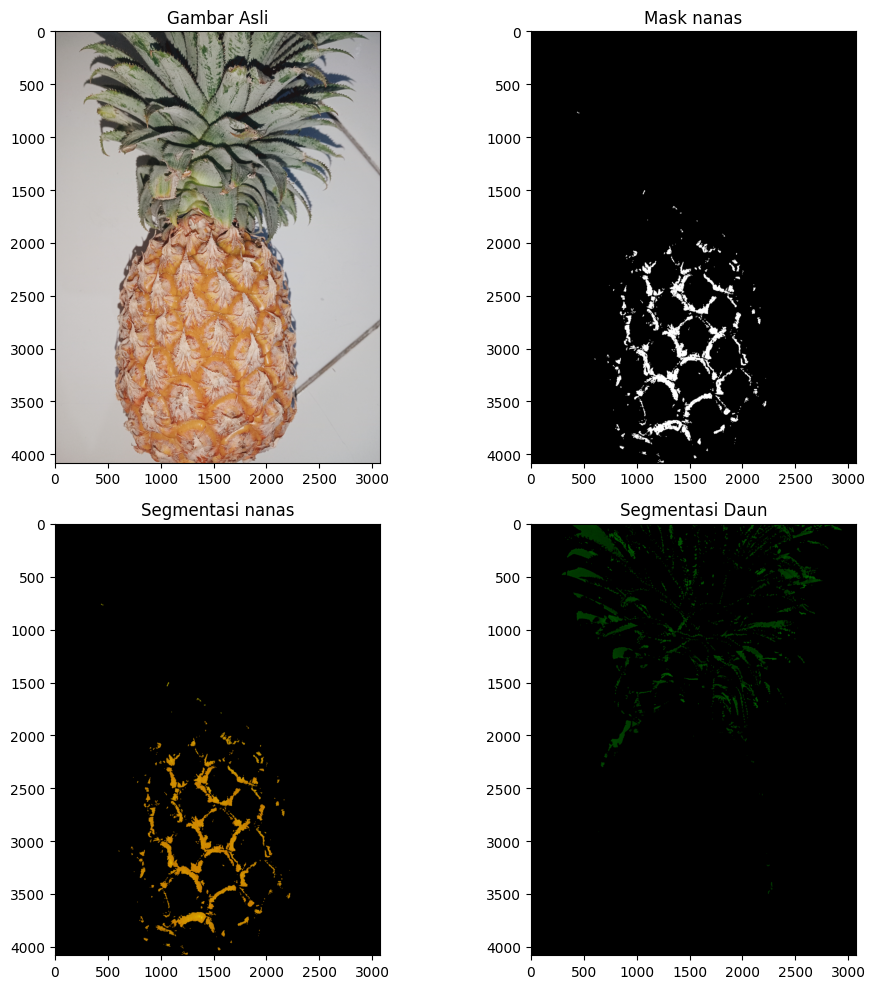

In [212]:
# Menampilkan Output
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

plt.subplot(2, 2, 1)
axs[0, 0].imshow(img_ori2)
axs[0, 0].set_title('Gambar Asli')

plt.subplot(2, 2, 2)
axs[0, 1].imshow(cv2.cvtColor(mask_buah, cv2.COLOR_GRAY2RGB))
axs[0, 1].set_title('Mask nanas')

plt.subplot(2, 2, 3)
axs[1, 0].imshow(segmented_buah)
axs[1, 0].set_title('Segmentasi nanas')

plt.subplot(2, 2, 2)
axs[1, 1].imshow(segmented_daun)
axs[1, 1].set_title('Segmentasi Daun')

plt.tight_layout()
plt.show()